## AFL 2 - DATA MINING
### Customer Analysis Dataset
#### Ros Diana (07060222100) - Belinda Putri Adi Permana (0706022210014)


The dataset that we'll use is Customer Analysis Dataset. This time, there are 5 points that we are going to do which are :
1. Data Cleaning
2. Data Preparation
3. Data Transformation
4. EDA
5. Clustering

### 1. Data Cleaning
In order to use the dataset, we have to clean the dataset from null values or unique values.

1a. Import libraries

In [ ]:
from kneed import KneeLocator
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.impute import SimpleImputer
from scipy.cluster.hierarchy import linkage, dendrogram

1b. Insert dataset

In [113]:
url = r'https://raw.githubusercontent.com/belinda2201/Data-Mining/refs/heads/main/customer_analysis.csv'
df = pd.read_csv(url, delimiter="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


1c. Checking for statistics

In [114]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


1d. Checking for datatypes

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

1d. Check for null and unique values

In [116]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

1e. Checking for duplicate values

In [117]:
duplicate_values = df[df.duplicated(keep=False)]
duplicate_values

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


1f. Checking for unique values

In [118]:
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

ID: [5524 2174 4141 ... 7270 8235 9405]
Year_Birth: [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]
Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Income: [58138. 46344. 71613. ... 56981. 69245. 52869.]
Kidhome: [0 1 2]
Teenhome: [0 1 2]
Dt_Customer: ['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '20-02-2013'
 '31-05-2013' '22-11-2013' '22-05-2014' '11-05-2013' '29-10-20

1g. Drop unimportant column(s)

In [119]:
df = df.drop(columns=['ID'])
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


### 2. Data Preparation
After cleaning the dataset, we have to prepeare the dataset.

2a. Fill null values

In [120]:
imputer = SimpleImputer(strategy='most_frequent')
df= pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [121]:
df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### 3. Data Transformation
Then we will transform the data so it is suitable for our goal.

3a. Encode the data

In [ ]:
label_encoder = LabelEncoder()
categorical_cols = ['Education', 'Marital_Status', 'Dt_Customer']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,2,4,58138.0,0,0,80,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,2,4,46344.0,1,1,157,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,2,5,71613.0,0,0,444,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,2,5,26646.0,1,0,199,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,4,3,58293.0,1,0,390,94,173,43,...,5,0,0,0,0,0,0,3,11,0


3b. Change datatype

In [ ]:
float_columns = df.select_dtypes(include=['float64']).columns
for col in float_columns:
    df[col] = df[col].round().astype('Int64') 

int32_columns = df.select_dtypes(include=['int32']).columns
for col in int32_columns:
    df[col] = df[col].astype('Int64')

float_columns = df.select_dtypes(include=['object']).columns
for col in float_columns:
    df[col] = df[col].round().astype('Int64') 

In [ ]:
df.info()

3b. Scale the data

In [125]:
scaler = StandardScaler()
numerical_columns = df.columns
df2 = pd.DataFrame(scaler.fit_transform(df[numerical_columns]), columns=numerical_columns)
df2.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,-0.985345,-0.350141,0.251004,0.250276,-0.825218,-0.929894,-1.303763,0.307039,0.983781,1.551577,...,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,2.388846
1,-1.235733,-0.350141,0.251004,-0.213095,1.032559,0.906934,-0.898762,-0.383664,-0.870479,-0.636301,...,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
2,-0.317643,-0.350141,1.180340,0.779692,-0.825218,-0.929894,0.610786,-0.798086,0.362723,0.570804,...,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
3,1.268149,-0.350141,1.180340,-0.987004,1.032559,-0.929894,-0.677853,-0.798086,-0.870479,-0.560857,...,0.281720,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
4,1.017761,1.428354,-0.678332,0.256366,1.032559,-0.929894,0.326760,1.550305,-0.389085,0.419916,...,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612


### 4. Explanatory Data Analysis
In this step, we will show the datas using visualization.

In [126]:
sns.set(style="whitegrid")

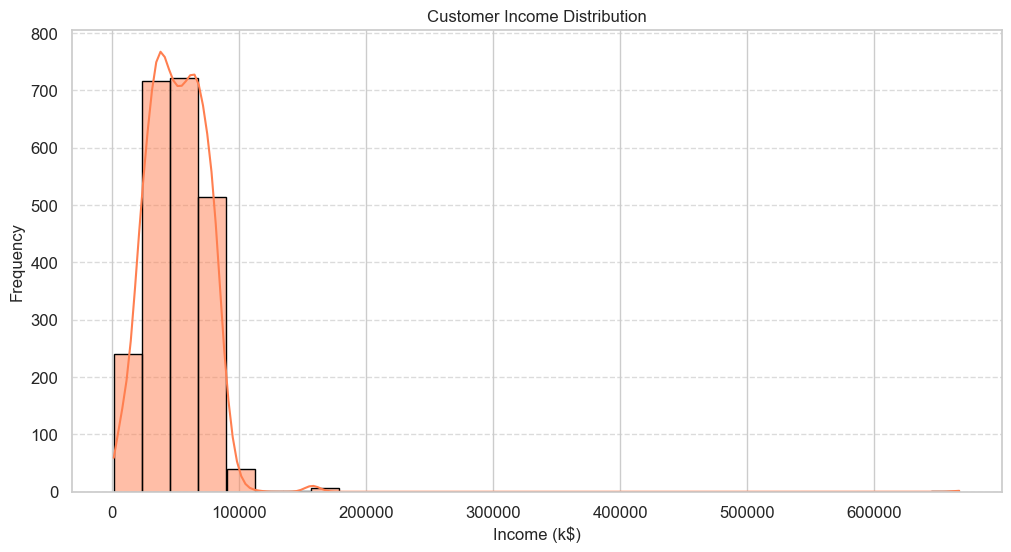

In [127]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Income'], bins=30, kde=True, color='coral', edgecolor='black')
plt.title('Customer Income Distribution')
plt.xlabel('Income (k$)')
plt.ylabel('Frequency')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

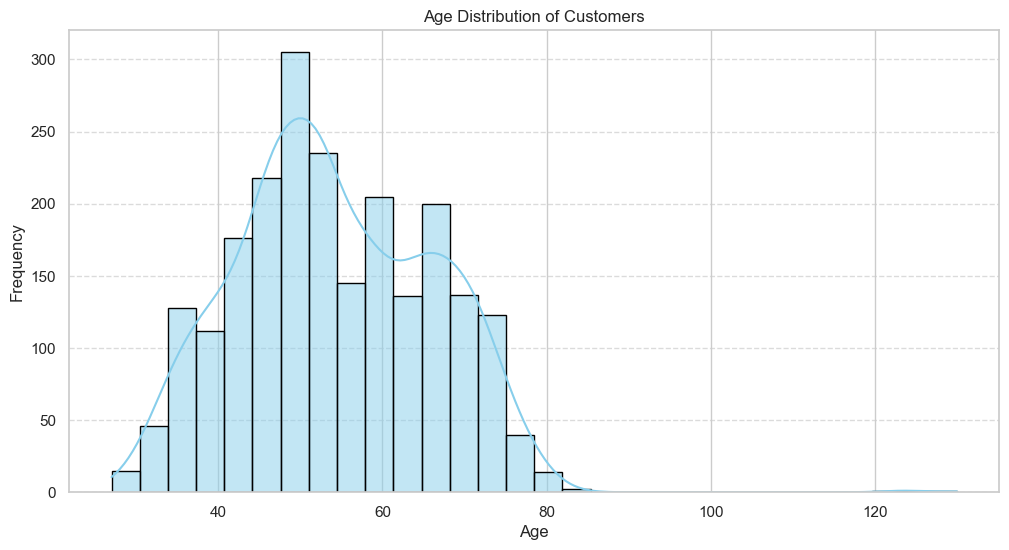

In [128]:
df['Age'] = 2023 - df['Year_Birth']

plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

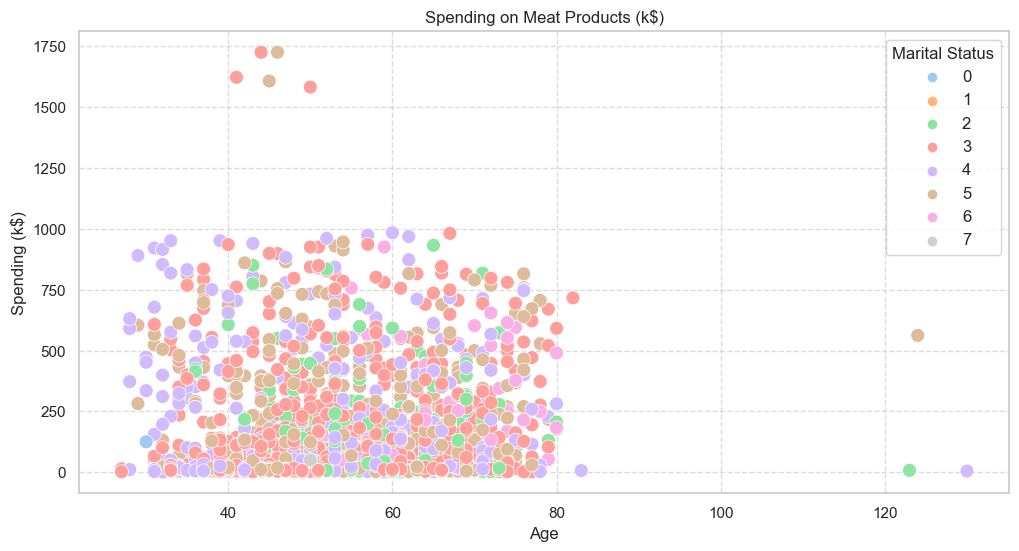

In [129]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Age', y='MntMeatProducts', hue='Marital_Status', palette='pastel', s=100, edgecolor='w', linewidth=0.5)
plt.title('Spending on Meat Products (k$)')
plt.xlabel('Age')
plt.ylabel('Spending (k$)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Marital Status', fontsize=12)
plt.show()

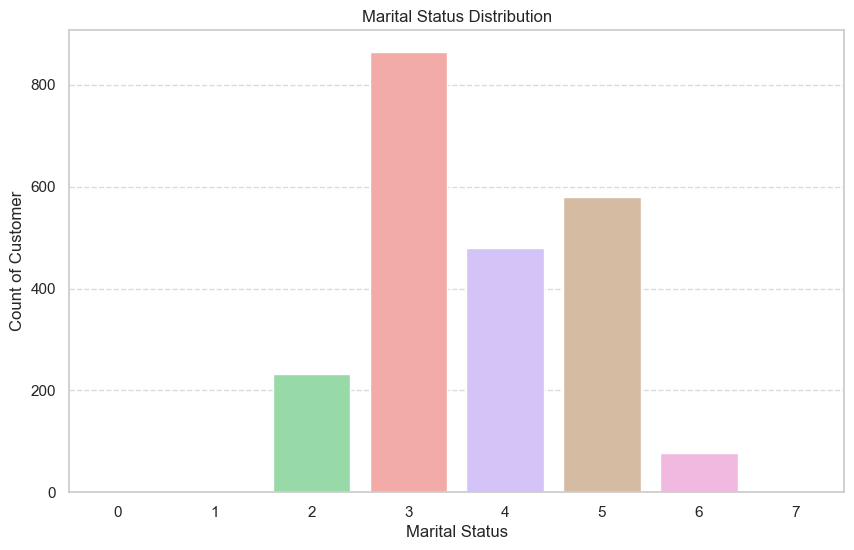

In [130]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Marital_Status', palette='pastel')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count of Customer')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 5. Analysis using K-Means and Hierarchical Clustering
The steps below are for clustering the datas.

5a. K-Means Method

c:\Users\Belinda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Belinda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Belinda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Belinda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

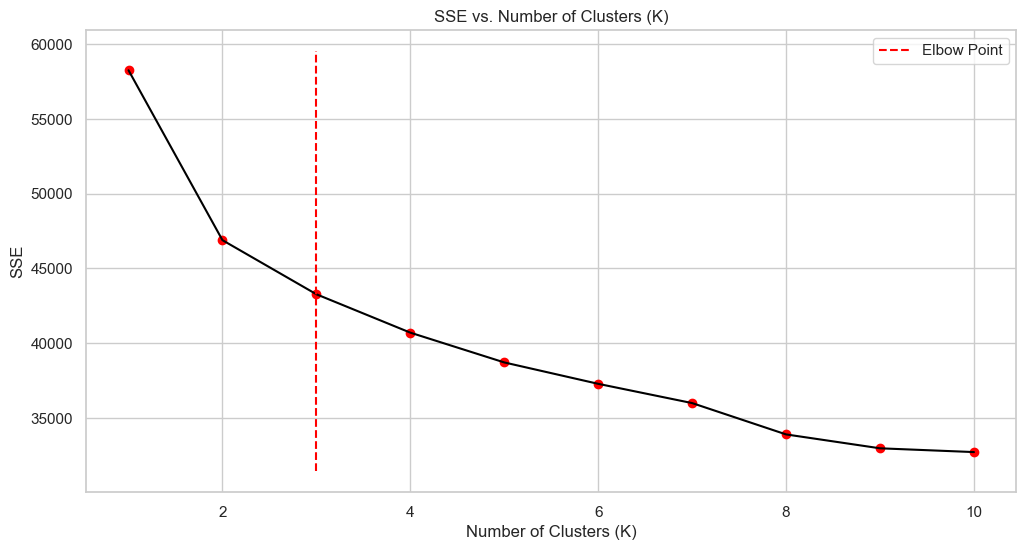

In [ ]:
sse=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df2)
    sse.append(kmeans.inertia_)

knee = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
plt.figure(figsize=(12, 6))
plt.plot(range(1,11), sse, color='black')
plt.scatter(range(1,11),sse,color='red')
plt.title('SSE vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.grid(True)

plt.vlines(knee.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='--', colors='red', label='Elbow Point')
plt.legend()
plt.show()

In [132]:
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
best_k = kneedle.elbow
print("The best k for you model is", best_k)

The best k for you model is 3


In [133]:
kmeans = KMeans(n_clusters=best_k, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df2)
y_pred
df['Cluster'] = y_pred

c:\Users\Belinda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [134]:
cluster_summary = df.groupby(y_pred)[['Education', 'Marital_Status', 'Dt_Customer']].agg(pd.Series.mode)
cluster_summary = cluster_summary.rename_axis('KMeans')
cluster_summary

C:\Users\Belinda\AppData\Local\Temp\ipykernel_19900\3453928441.py:1: FutureWarning: ['Dt_Customer'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cluster_summary = df.groupby(y_pred)[['Education', 'Marital_Status', 'Dt_Customer']].agg(pd.Series.mode)


,Education,Marital_Status
KMeans,,
0,2,3
1,2,3
2,2,3


In [135]:
df.groupby(y_pred)['Year_Birth', 'Education', 'Marital_Status', 'Income', 
    'Kidhome', 'Teenhome', 'Recency', 'MntWines', 
    'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
    'NumWebPurchases', 'NumCatalogPurchases', 
    'NumStorePurchases', 'NumWebVisitsMonth', 'Response'].agg(pd.Series.mean)

C:\Users\Belinda\AppData\Local\Temp\ipykernel_19900\1205015375.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(y_pred)['Year_Birth', 'Education', 'Marital_Status', 'Income',


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response
0,1971.553861,2.268827,3.715920,34589.214490,0.795043,0.447092,49.529075,43.006673,4.929457,23.732126,7.416587,5.063870,15.522402,2.079123,2.147760,0.556721,3.221163,6.476644,0.093422
1,1968.623188,2.340580,3.800725,77253.510870,0.039855,0.144928,49.782609,613.807971,68.739130,469.483696,100.791667,70.650362,77.677536,1.257246,5.067029,6.101449,8.326087,2.764493,0.300725
2,1964.452269,2.644757,3.691706,57952.871674,0.217527,0.915493,47.838811,464.600939,24.729264,140.716745,32.300469,25.524257,61.733959,3.651017,6.416275,3.147105,7.816901,5.616588,0.109546


In [136]:
df.groupby("Cluster")["Cluster"].agg(pd.Series.count)

Cluster
0    1049
1     552
2     639
Name: Cluster, dtype: int64

5b. Hierarchical Clustering

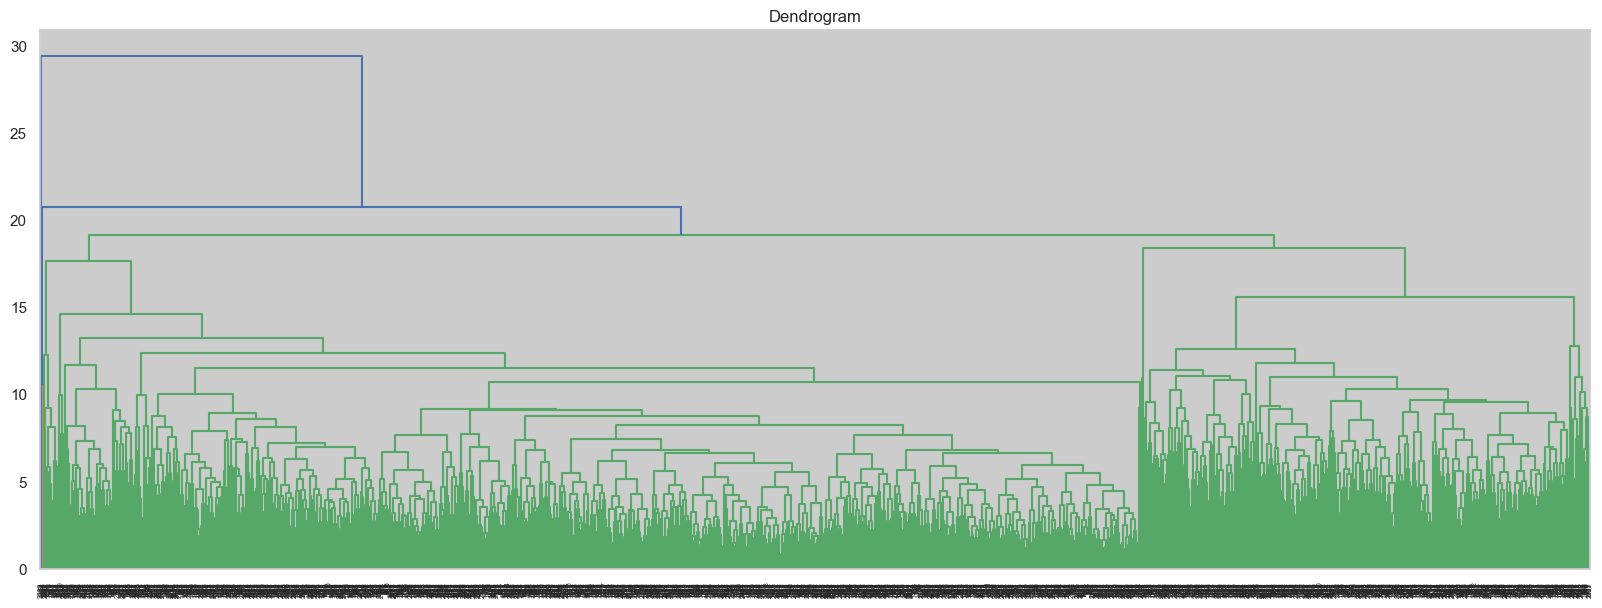

In [137]:
plt.figure(figsize=(20,7))
plt.title("Dendrogram")
linkage_data = linkage(df2, method='complete')
dendrogram(linkage_data)
plt.show()

In [138]:
model = AgglomerativeClustering(n_clusters=best_k, affinity='euclidean')
label = model.fit_predict(df2)
label

c:\Users\Belinda\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 2, 0, ..., 1, 1, 1], dtype=int64)

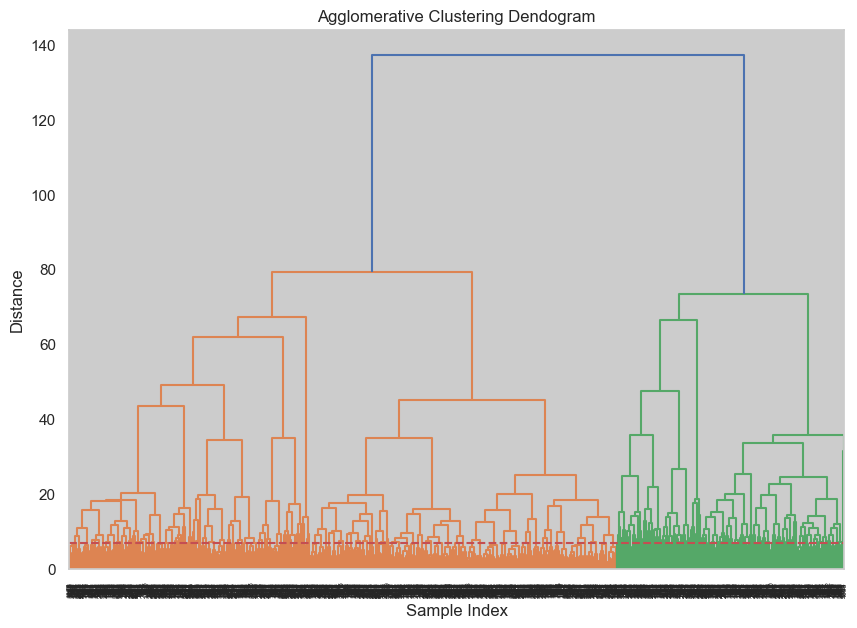

In [ ]:
linked = linkage(df2, method='ward')

plt.figure(figsize=(20, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Agglomerative Clustering Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.axhline(y=7, color='r', linestyle='--')  # Optional: Add a horizontal line to indicate the cut-off for clusters
plt.show()

In [140]:
df2["Agglo"] = label
cluster_summary = df.groupby(y_pred)['Education', 'Marital_Status', 'Dt_Customer'].agg(pd.Series.mode)
cluster_summary = cluster_summary.rename_axis('agglo')
cluster_summary

C:\Users\Belinda\AppData\Local\Temp\ipykernel_19900\2439890241.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_summary = df.groupby(y_pred)['Education', 'Marital_Status', 'Dt_Customer'].agg(pd.Series.mode)
C:\Users\Belinda\AppData\Local\Temp\ipykernel_19900\2439890241.py:2: FutureWarning: ['Dt_Customer'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cluster_summary = df.groupby(y_pred)['Education', 'Marital_Status', 'Dt_Customer'].agg(pd.Series.mode)


,Education,Marital_Status
agglo,,
0,2,3
1,2,3
2,2,3


In [141]:
df.groupby(label)['Year_Birth', 'Education', 'Marital_Status', 'Income', 
    'Kidhome', 'Teenhome', 'Recency', 'MntWines', 
    'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
    'NumWebPurchases', 'NumCatalogPurchases', 
    'NumStorePurchases', 'NumWebVisitsMonth', 'Response'].agg(pd.Series.mean)

C:\Users\Belinda\AppData\Local\Temp\ipykernel_19900\49914521.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(label)['Year_Birth', 'Education', 'Marital_Status', 'Income',


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response
0,1968.208207,2.328267,3.799392,73674.527356,0.074468,0.265957,49.200608,571.422492,63.895137,409.091185,91.589666,66.393617,77.750760,1.617021,5.416413,5.472644,8.366261,3.243161,0.261398
1,1966.893218,2.613276,3.725830,51999.772006,0.425685,0.780664,46.984127,381.617605,17.049062,119.425685,23.595960,17.200577,50.441558,3.574315,5.396825,2.712843,6.405483,6.184704,0.233766
2,1970.739033,2.271091,3.681665,35372.584927,0.732283,0.470191,50.698538,45.398200,5.690664,24.773903,8.367829,5.640045,14.052868,1.875141,2.076490,0.542182,3.403825,6.174353,0.000000


In [142]:
df2.groupby(label)["Agglo"].agg(pd.Series.count)

0    658
1    693
2    889
Name: Agglo, dtype: int64

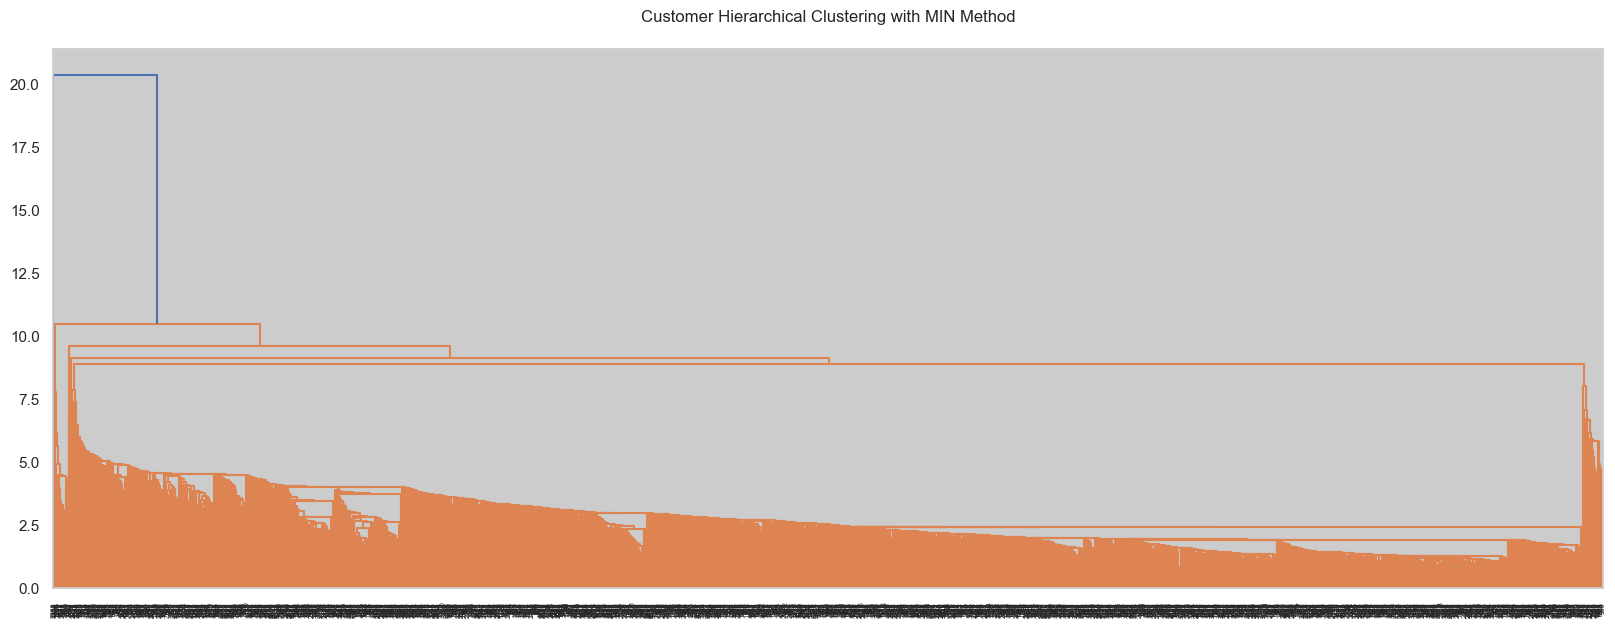

In [143]:
plt.figure(figsize=(20,7))
plt.title("Customer Hierarchical Clustering with MIN Method", pad=20)
dendro = sch.dendrogram(sch.linkage(df2, method="single"))

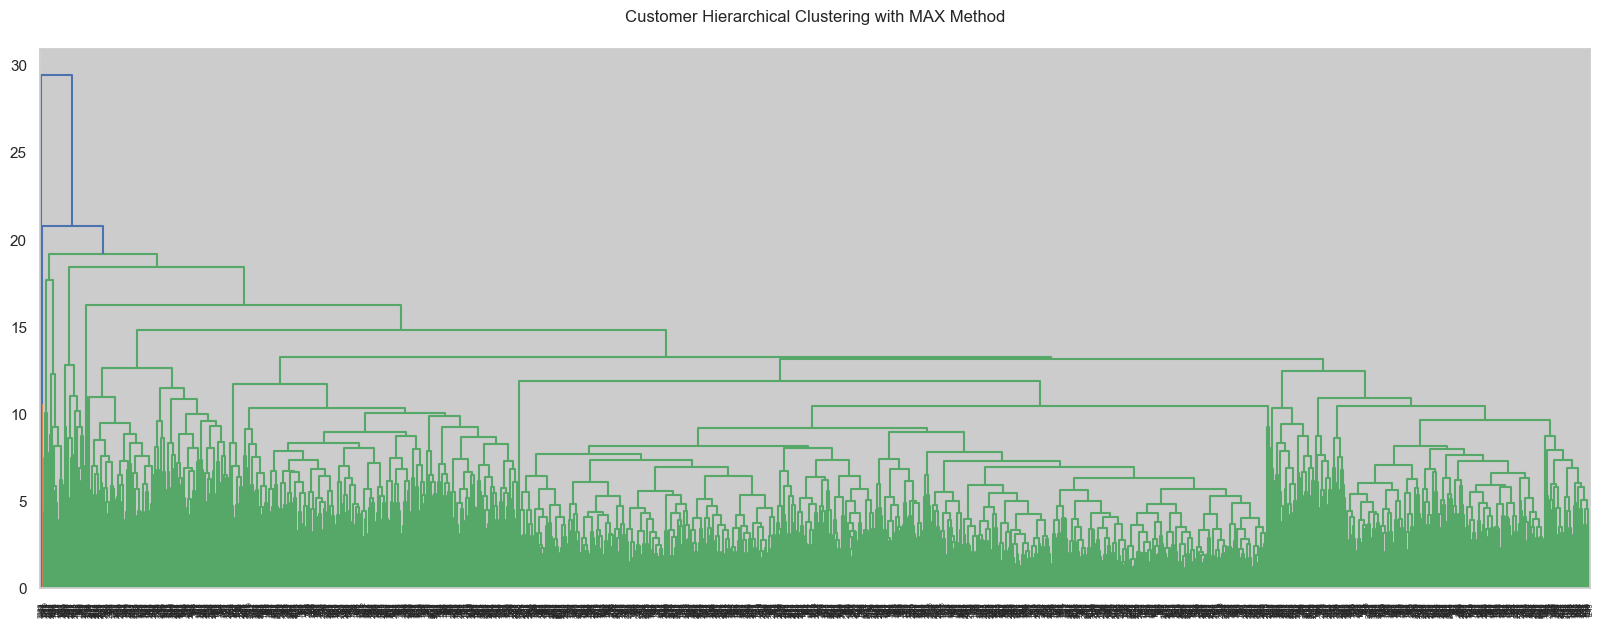

In [144]:
plt.figure(figsize=(20,7))
plt.title("Customer Hierarchical Clustering with MAX Method", pad=20)
dendro = sch.dendrogram(sch.linkage(df2, method="complete"))

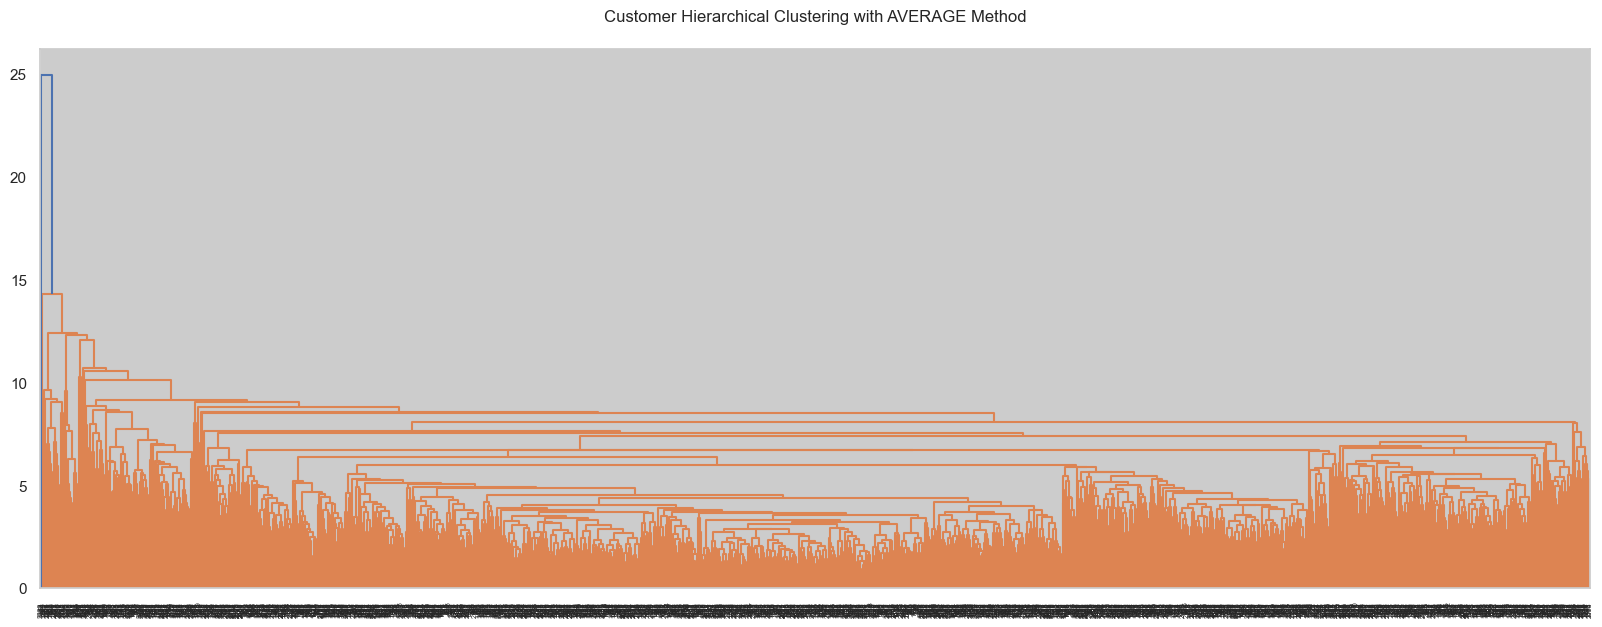

In [145]:
plt.figure(figsize=(20,7))
plt.title("Customer Hierarchical Clustering with AVERAGE Method", pad=20)
dendro = sch.dendrogram(sch.linkage(df2, method="average"))

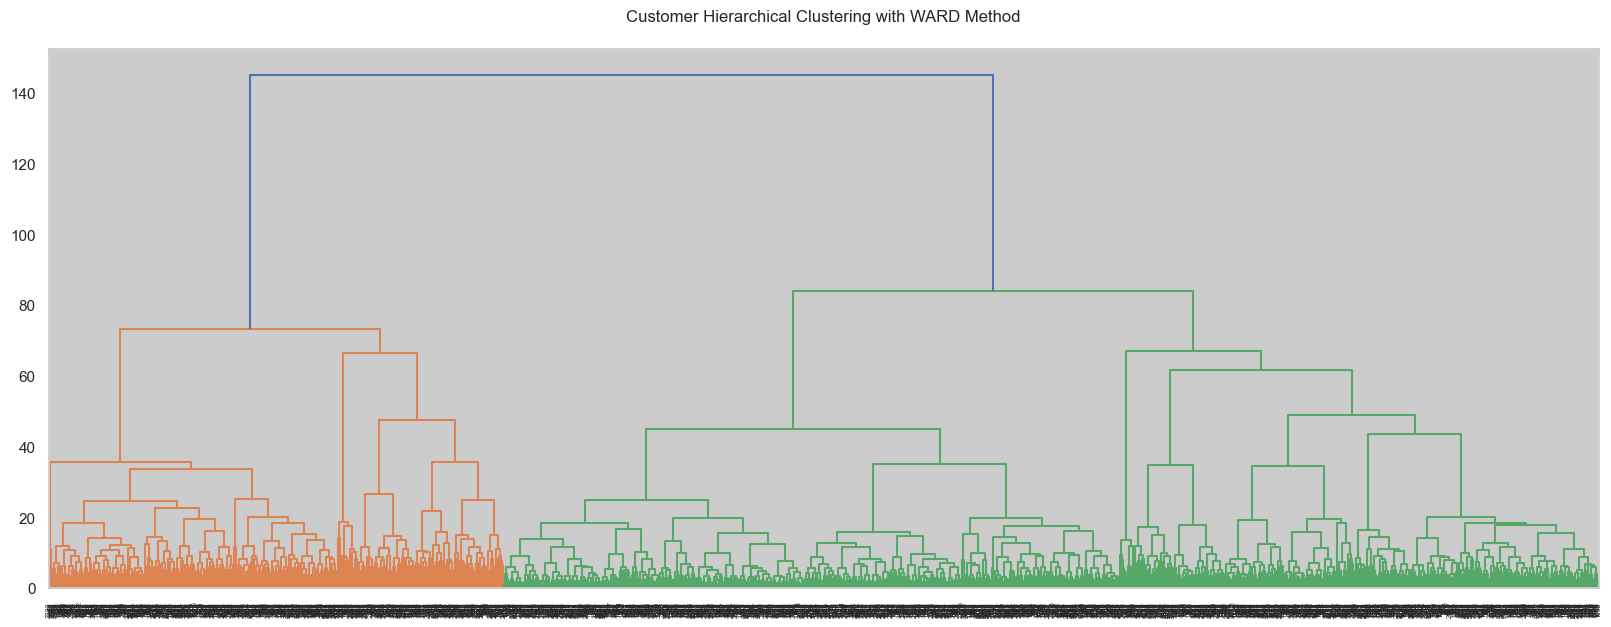

In [146]:
plt.figure(figsize=(20,7))
plt.title("Customer Hierarchical Clustering with WARD Method", pad=20)
dendro = sch.dendrogram(sch.linkage(df2, method="ward"))

### Case Study

1. Customer segmentation based on purchase behaviours.

c:\Users\Belinda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Belinda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Belinda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Belinda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

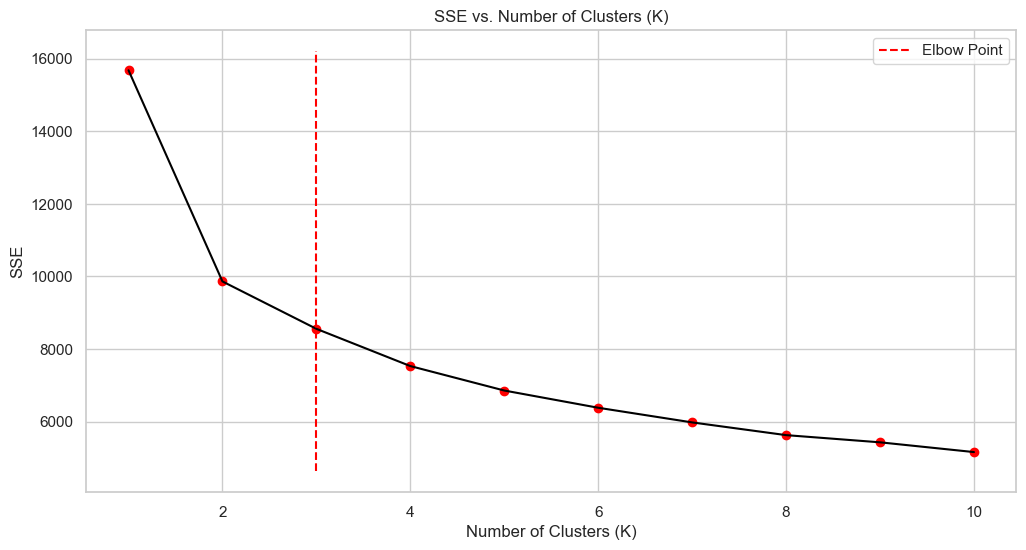

In [ ]:
features_segmentation = [
    'Recency', 
    'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

df_segmentation = df[features_segmentation].dropna()

scaler = StandardScaler()
segmentation_scaled = scaler.fit_transform(df_segmentation)

sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(segmentation_scaled)
    sse.append(kmeans.inertia_)


knee = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
plt.figure(figsize=(12, 6))
plt.plot(range(1,11), sse, color='black')
plt.scatter(range(1,11),sse,color='red')
plt.title('SSE vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.grid(True)

plt.vlines(knee.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='--', colors='red', label='Elbow Point')
plt.legend()
plt.show()


In [148]:
best_k = kneedle.knee
print("The best k for you model is", best_k)


The best k for you model is 3


In [149]:
kmeans = KMeans(n_clusters=best_k, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(segmentation_scaled)
df['KMeans'] = y_pred
y_pred

c:\Users\Belinda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 1, 0, ..., 0, 0, 1])

In [150]:
cluster_summary = df.groupby('KMeans').agg({
    'Recency': 'mean', 
    'MntWines': 'mean', 
    'MntFruits': 'mean', 
    'MntMeatProducts': 'mean', 
    'MntFishProducts': 'mean', 
    'MntSweetProducts': 'mean',
    'MntGoldProds': 'mean'
})
cluster_summary

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
KMeans,,,,,,,
0,51.661871,648.901079,30.656475,295.613309,45.451439,29.863309,73.818345
1,48.424312,94.920489,6.435015,35.155963,9.009174,6.387615,18.489297
2,47.718085,520.933511,88.976064,435.167553,125.005319,94.845745,88.781915


In [151]:
df.groupby('KMeans')['KMeans'].agg(pd.Series.count)

KMeans
0     556
1    1308
2     376
Name: KMeans, dtype: int64

2. Segmentation Based on Campaign Response

In [152]:
features_campaign = [
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
    'AcceptedCmp4', 'AcceptedCmp5', 'Response'
]

df_campaign = df[features_campaign].dropna()

campaign_scaled = scaler.fit_transform(df_campaign)


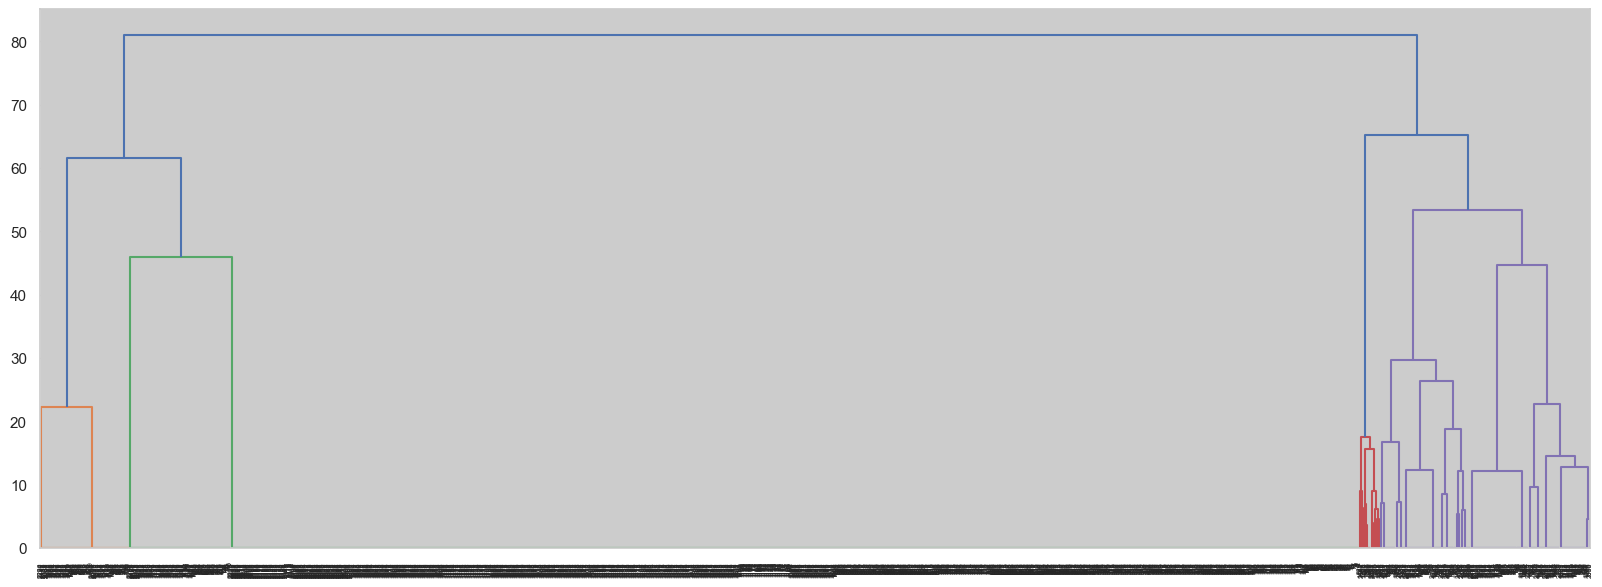

In [153]:
plt.figure(figsize=(20,7))
linkage_data = linkage(campaign_scaled, method='ward')
dendrogram(linkage_data)
plt.show()

In [154]:
model = AgglomerativeClustering(n_clusters=best_k, affinity='euclidean')
y_predAC = model.fit_predict(campaign_scaled)
df['Agglo'] = y_predAC
y_predAC

c:\Users\Belinda\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [155]:
cluster_summaryAC = df.groupby('Agglo').agg({
    'AcceptedCmp1': 'mean',
    'AcceptedCmp2': 'mean',
    'AcceptedCmp3': 'mean', 
    'AcceptedCmp4': 'mean', 
    'AcceptedCmp5': 'mean',
    'Response': 'mean'
})
cluster_summaryAC

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Agglo,,,,,,
0,0.000000,0.0,0.067681,0.000000,0.000000,0.105456
1,0.430921,0.0,0.088816,0.476974,0.480263,0.371711
2,0.433333,1.0,0.233333,0.733333,0.566667,0.666667


In [156]:
df.groupby('Agglo')['Agglo'].count()

Agglo
0    1906
1     304
2      30
Name: Agglo, dtype: int64

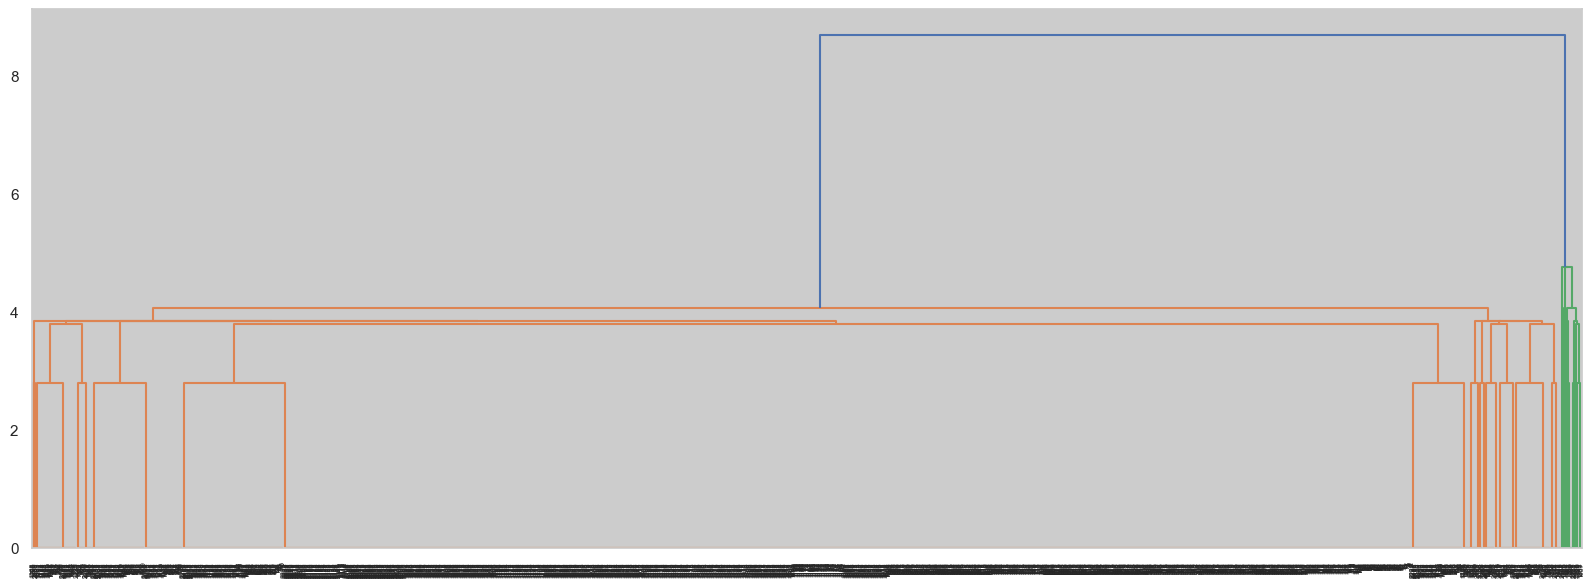

In [157]:
plt.figure(figsize=(20,7))
linkage_data = linkage(campaign_scaled, method='single')
dendrogram(linkage_data)
plt.show()